# 05 - Better Modeling

We talked about types of philosophy behind 4 kinds of prediction methods last time. Now build on ***top*** of that, we would discuss about some addtional concepts for modeling and performance evaluation in modern times(well, I mean in these 30 years). Note that I highlight the top word. It means the concepts we will talk today are regardless the method and evaluation metrics. 

For our Article example in the first section, we knew a typical data project has these steps

- Define the goal, task
- Data preprocessing
- Explanatory data analysis
- Feature engineering
- **Modeling**
- **Performance evaluation**

The dataset we are going to use today is the [Titanic dataset](https://www.kaggle.com/c/titanic/overview), which is one of the popular practing dataset on Kaggle.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("./titanic_train.csv").set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div><img src="./titanic_col.png" width="500"/></div>


In [2]:
from sklearn.preprocessing import LabelEncoder
for col in ['Name','Sex','Ticket','Cabin','Embarked']:
    data[col] = LabelEncoder().fit_transform(data[col].fillna('na'))
data.fillna(0,inplace = True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,1,22.0,1,0,523,7.2500,147,2
2,1,1,190,0,38.0,1,0,596,71.2833,81,0
3,1,3,353,0,26.0,0,0,669,7.9250,147,2
4,1,1,272,0,35.0,1,0,49,53.1000,55,2
5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Survived'],axis = 'columns'),data['Survived'],test_size=0.2)

In [4]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
30,3,813,1,0.0,0,0,362,7.8958,147,2
460,3,603,1,0.0,0,0,468,7.7500,147,1
187,3,601,0,0.0,1,0,459,15.5000,147,1
114,3,417,0,20.0,1,0,491,9.8250,147,2
493,1,547,1,55.0,0,0,41,30.5000,64,2


In [5]:
y_train.head()

PassengerId
30     0
460    0
187    1
114    0
493    0
Name: Survived, dtype: int64

In [6]:
X_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
332,1,637,1,45.5,0,0,20,28.5000,56,2
116,3,645,1,21.0,0,0,666,7.9250,147,2
824,3,550,0,27.0,0,1,486,12.4750,118,2
66,3,560,1,0.0,1,1,189,15.2458,147,0
56,1,873,1,0.0,0,0,94,35.5000,71,2


---
# Model type, hyperparameter, parameter
You might have heard these words: model tuning, adjusting model parameters, 調整參數, 尋找最佳參數, 超參數設定. To clarify what these action let's look at these 3 nouns.

- Model type: Determine the model philosophy.  
- Hyperparameter: Given the model type, determine the learning behavior. Hyperparameters are not related to data and were setted before modeling. 
    - E.g. The splitting criterion in decision tree
- Model parameter: The settings learned from data. Model parameters were determined by machine.
    - E.g. Given the data, find the coefficients in linear regression-> coefficients are model parameters
    - E.g. Given the data, find the spliting nodes in decision tree-> the nodes are model parameters

## Examples
Take linear regression as an example.
- Model type: linear regression means the model would take the form $ y = f(w_1* x_1 + w_2 * x_2...)$
- Parameters: $w_1, w_2...$ they will be found/determined based on data.
- Hyperparamter: the technique/criteria for finding parameters.

Take KNN as an example
- Model type: take "neighbors" as references
- HyperparameterL: "K", calculation method for distance and calculation for aggreating neighbors
- Parameters: None

What about Decision tree?
<div><img src="./tree_hyperparameters.png" width="300"/></div>

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
dt_clf = DecisionTreeClassifier()
plt.figure(figsize=(5,5))
dt_clf.fit(X_train,y_train)
plot_tree(dt_clf)
plt.show()

<Figure size 500x500 with 1 Axes>

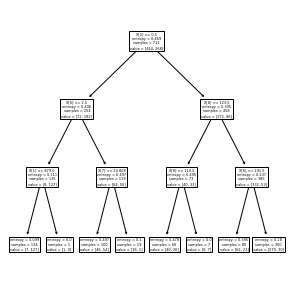

In [8]:
dt_clf2 = DecisionTreeClassifier(max_depth=3)
plt.figure(figsize=(5,5))
dt_clf2.fit(X_train,y_train)
plot_tree(dt_clf2)
plt.show()


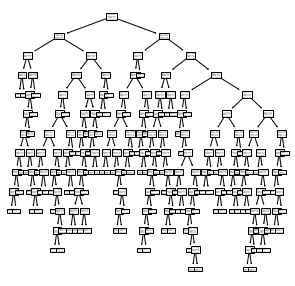

In [9]:
dt_clf3 = DecisionTreeClassifier(criterion='entropy')
plt.figure(figsize=(5,5))
dt_clf3.fit(X_train,y_train)
plot_tree(dt_clf3)
plt.show()

Now we have better understanding what hyperparameter is about. The 3 graphs are all trees,

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,dt_clf.predict(X_test)))
print(accuracy_score(y_test,dt_clf2.predict(X_test)))
print(accuracy_score(y_test,dt_clf3.predict(X_test)))

0.7653631284916201
0.8324022346368715
0.7932960893854749


- Which tree is more complex?
- Which tree is better?


---
# Overfitting & Underfitting

According to wikipedia, 

## Overfitting
Overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably"

An overfitted model is a statistical model that contains more parameters than can be justified by the data. The essence of overfitting is to have unknowingly extracted some of the residual variation (i.e. the noise) as if that variation represented underlying model structure.

<div><img src="./Overfitting.svg" width="300"/></div>

## Underfitting
Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An underfitted model is a model where some parameters or terms that would appear in a correctly specified model are missing. Underfitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

Combining over- and under-fitting, if we put this in a decision making aspect, we could think it as **bias-variance tradeoff** (Bias: model makes many errors, Variance: model has complex, many adjustable possiblity)
<div><img src="./bias_variance_tradeoff.png" width="600"/></div>

## How to avoid overfitting?
- Early stop (how to determine when is not too early?)
- Regulariztion (Will explain later)
- Compare performance on training and testing data-> CV then evaluate on test data

## Let's try the third solution for avoiding overfitting

In [11]:
res = pd.DataFrame(columns = ['criterion','splitter','max_depth','min_samples_split','training_acc','testing_acc'])
for criterion in ['gini','entropy']:
    for splitter in ['best','random']:
        for max_depth in [3,5,7,9,11]:
            for min_samples_split in [2**(i+1) for i in range(5)]:
                dtclf = DecisionTreeClassifier(criterion = criterion,splitter = splitter,max_depth = max_depth,min_samples_split = min_samples_split).fit(X_train,y_train)
                res = res.append({'criterion':criterion,
                            'splitter':splitter,
                            'max_depth':max_depth,
                            'min_samples_split':min_samples_split,
                            'training_acc':accuracy_score(y_train,dtclf.predict(X_train)),
                            'testing_acc':accuracy_score(y_test,dtclf.predict(X_test)),
                           },ignore_index = True)

In [12]:
res.sort_values(by = 'testing_acc',ascending = False).head()

,criterion,splitter,max_depth,min_samples_split,training_acc,testing_acc
43,gini,random,9,16,0.867978,0.843575
0,gini,best,3,2,0.813202,0.832402
54,entropy,best,3,32,0.811798,0.832402
53,entropy,best,3,16,0.811798,0.832402
52,entropy,best,3,8,0.811798,0.832402


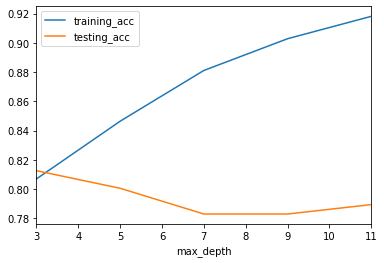

In [13]:
# Question: The more the max_depth, the better the performance? 
res.groupby(['max_depth'])[['training_acc','testing_acc']].mean().plot()

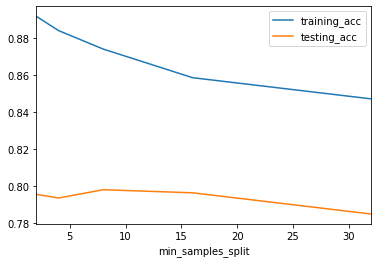

In [14]:
# Question: The more the min_samples_split, the better the performance? 
res.groupby(['min_samples_split'])[['training_acc','testing_acc']].mean().plot()

**->  Unlike model parameters, there is NO regularity or rules to find good hyperparameter**



**Question: So we just try different settings and run it and see which perform best on testing data? What is the risk of this approach? How might we deal with it?**

The testing data is usually been treated as "unseen" data so that we could evaluate the performance for the model fairly. If we pick hyperparameter set on testing data, we are actually picking model favoring the testing data we choose. **We make the model peek the testing data through hyperparameter picking. This ruin the spirit of testing data**

- At this point we may also ask: Is train-test split a good way?
- train - **validation(tuning)** - testing
- **cross validation**

----
# Cross Validation
We want to exploit whole data set. For K-Fold CV, we (randomly) split data into K partitions. Train on K-1 partitions, evaluate(validate) on 1 fold. Commonly we take K = 5 or 10.

<div><img src="./cross_validation.png" width="500"/></div>

- If we find a hyperparameter setting perform reasonably good on all folds, we are more confident that the setting would be "stable" on unseen data

**Question: What is the final model?**  
**Question: Do we successfully avoid data peeking?**

## A common pratice of combining cross validation and testing data
<div><img src="./grid_search_cross_validation.png" width="500"/></div>

- Use CV to find good hyperparameter and then evaluate the performance on testing data
- **Good hyperparameter means the hyperparameter make the model with the setting perform consistently and reasonably well across folds in CV**

Let's see how it is done in Python. We try the hyperparameters combinations above. But this time we use 5-fold CV and pick the best hyperparameter setting.

In [15]:
# K fold on training data
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':[3,5,7,9,11],
              'min_samples_split':[2**(i+1) for i in range(5)]}
dtclf = DecisionTreeClassifier()
girdclf = GridSearchCV(dtclf, parameters)
girdclf.fit(X_train,y_train)


/home/bagel/anaconda3/envs/jupyter/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                

In [16]:
# the best hyperparameter
girdclf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 4,
 'splitter': 'random'}

In [17]:
# evaluate on testing data
print(accuracy_score(y_test,girdclf.predict(X_test)))

0.8156424581005587


# Regularization
Besides evaluate on different data sets, could we prevent our model overfitting while training? Regularization means we add some "punishment" on model beinng too complex.  
In other words, we make the model fitting not just to find the paramters that make small error. It has to find the parameters that make small error and small complexity at the same time.

## Example
Let's see an example. Suppose we want to fit a model for the following data set. The data set has a target `y` and an only feature `x`

In [18]:
import numpy as np
data = pd.DataFrame()
data['x'] = np.random.choice(range(60),30)
data['y'] = [i+np.random.choice(range(100))*14/100 if i%4==0 
             else i-np.random.choice(range(10))*7/10 if i%3==0 
             else i-6 if i%5 == 0 
             else i for i in data['x'].values ]
data.head()

,x,y
0,47,47.0
1,47,47.0
2,9,6.2
3,46,46.0
4,27,21.4


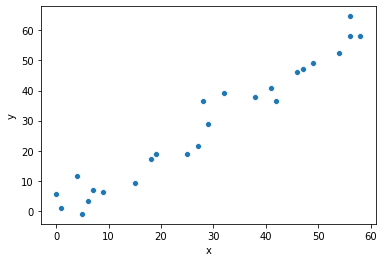

In [19]:
import seaborn as sns
sns.scatterplot(data['x'],data['y'])

### Try #1: Let's fit a model takes the form:  
$ y = w_0 + w_1 *x$

In [20]:
from sklearn.linear_model import LinearRegression
first_model = LinearRegression()
first_model.fit(data[['x']],data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print("w1: "+str(first_model.coef_[0]))
print("w0: "+str(first_model.intercept_))

w1: 1.0206318192417678
w0: -0.47015427288012646


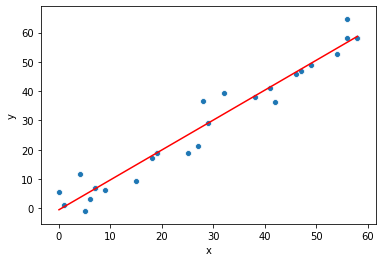

In [22]:
sns.lineplot(data['x'],data['x']*first_model.coef_[0]+first_model.intercept_,color = 'red')
sns.scatterplot(data['x'],data['y'])

### Try #2: Let's fit a model takes the form:  
$ y = w_0 + w_1 *x + w_2*x^2 + w_3*x^{3} + + w_4*x^{4} + + w_5*x^{5}$

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
new_data = pd.concat([pd.DataFrame(poly.fit_transform(data[['x']]),columns = ['x_'+str(i) for i in range(6)]),data['y']],axis = 'columns')
second_model = LinearRegression()
second_model.fit(new_data.drop('y',axis= 'columns'),new_data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

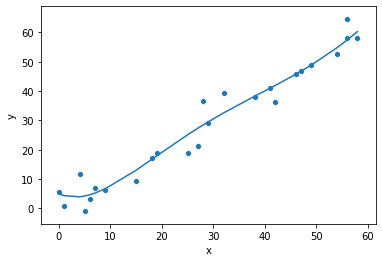

In [24]:
sns.lineplot(data['x'],second_model.predict(new_data.drop('y',axis= 'columns')))
sns.scatterplot(data['x'],data['y'])

The Try#2 is more complex than Try#1 and has smaller fitting error. Could we make a even more complex model?
### Try #3
$ y = w_0 + w_1 *x + w_2*x^2 + ... w_{15}*x^{15}$

In [25]:
poly = PolynomialFeatures(degree=15)
third_data = pd.concat([pd.DataFrame(poly.fit_transform(data[['x']]),columns = ['x_'+str(i) for i in range(16)]),data['y']],axis = 'columns')
third_model = LinearRegression()
third_model.fit(third_data.drop('y',axis= 'columns'),new_data['y'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

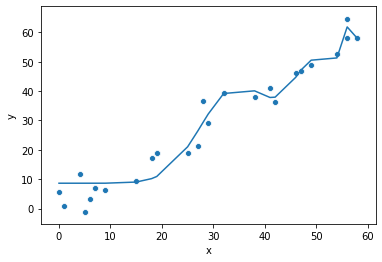

In [26]:
sns.lineplot(data['x'],third_model.predict(third_data.drop('y',axis= 'columns')))
sns.scatterplot(data['x'],data['y'])

In [27]:
third_model.coef_

array([ 0.00000000e+00,  7.75304860e-15, -3.52429757e-18,  1.10002342e-20,
        2.57267516e-19,  6.00930752e-18,  1.29612917e-16,  2.50845747e-15,
        4.13714763e-14,  5.24819210e-13,  3.90879804e-12, -3.91269897e-13,
        1.55813059e-14, -3.09518232e-16,  3.06770814e-18, -1.21345426e-20])

Oops, it seems Try#3 overfited.

## Loss function, error, model complexity 

To see how we could prevent our model from overfitting in training, we have to go back know more about how did machine find the parameter in linear regression?


### Original linear regression

We ask machine to "Find a good parameter set $W_0, W_1...$, so that the fitted model has minimum error"

The function that algorithm would find its minimum is called **loss function**.  Note that loss function could be consist of not (just) modeling error.  

Since we have the idea, we can manipulate our loss function, make it punish the model being too complex.

### Linear regression with regularization
We want machine to minimize modeling error and model complexity at the same time. So we add some complexity component into our loss function
$ Loss\ function = Error +\lambda* model\ complexity$

- $Error $: could be mse, rmse...
- $model\ complexity$: could be the number of parameter, number of tree leaf. $\lambda$ determine the degree of punsihment for model complexity


Some common regularization in linear regression
- L2: $\min _{w}\sum _{i=1}^{n}Error({\hat {x}}_{i}\cdot w,{\hat {y}}_{i})+\lambda \|w\|_{2}^{2}$
- L1: $\min _{w}\sum _{i=1}^{n}Error({\hat {x}}_{i}\cdot w,{\hat {y}}_{i})+\lambda \|w\|_{2}$

Let's go back to our example. Now let's add some regulariztion into Try#3

In [28]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(third_data.drop('y',axis= 'columns'),new_data['y'])

/home/bagel/anaconda3/envs/jupyter/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211.2772321624564, tolerance: 1.179623872
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

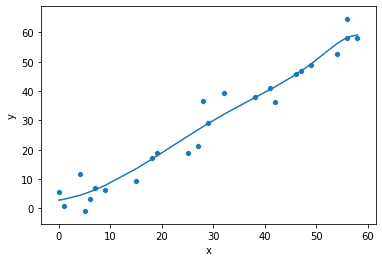

In [29]:
sns.lineplot(data['x'],lasso_model.predict(third_data.drop('y',axis= 'columns')))
sns.scatterplot(data['x'],data['y'])

In [30]:
lasso_model.coef_

array([ 0.00000000e+00,  2.64734174e-01,  3.72536903e-02, -4.34809552e-04,
       -3.68594822e-06, -7.53394534e-09,  3.65195760e-10,  9.11942230e-12,
        1.50058312e-13,  1.99885590e-15,  2.13425054e-17,  1.36538445e-19,
       -1.34880917e-21, -7.96120513e-23, -2.20676023e-24, -5.01959342e-26])

---
# Ensemble: blend, bagging, boosting, stacking

Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.


## Bagging
In order to promote model variance, bagging trains each model in the ensemble using a randomly drawn subset of the training set.

### Random Forest
<div align = "center" ><img src="./forest.jpeg" width="300"/>Photo by Sebastian Unrau on Unsplash</div>


We had seen decision tree. Random forest build multiple trees and let them vote for final prediction.  
**Each tree is built on a sample of training data and a sample of features.**

**Why would this work? What's the benefits?**  
**Build a complicated tree VS random forest that is consist of simple trees. Which better?**

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()
rfclf.fit(X_train,y_train)

/home/bagel/anaconda3/envs/jupyter/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rfclf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
print(accuracy_score(y_test,rfclf.predict(X_test)))

0.8491620111731844


## Boosting
Boosting involves **incrementally** building an ensemble by training each new model instance to emphasize the training instances that previous models mis-classified.

**How to improve from the last modeling?**

- Adaptive Boosting(AdaBoost): boosting by adjusting data distribution
- Gradient Boosting: boosting by setting loss function, make scoring in rounds

Gradient Boosting Decision Trees (GDBT) is a popular category of gradient boosting algorithm in these years. E.g. XGBoost, LightGBM, CatBoost

### XGBoost
"XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data."

In [34]:
from xgboost import XGBClassifier
xgbclf = XGBClassifier()
xgbclf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [35]:
print(accuracy_score(y_test,xgbclf.predict(X_test)))

0.8156424581005587


## Blending

Take average/vote of the models

**What to blend?**
- Good performance
- Low correlated


## Stacking
Stacking involves training a learning algorithm to combine the predictions of several other learning algorithms.

<div><img src="./stacking.png" width="300"/><center>source: Prof Hun-yi Lee's course</center></div>


# References
- ensemble: http://violin-tao.blogspot.com/2018/01/ml-ensemble.html